In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

# Symbolic regression

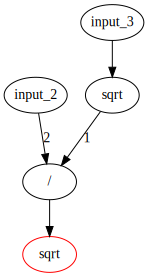

In [2]:
from geopt import Evolution
from geopt import operations

E = Evolution(3, 10, 1, popsize=20, bestsize=3, newgen=5, ops=operations.ops)

t = E.random_tree()

t.visualize(True)

In [3]:
a = t.visualize(False)

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))


-42.1105422947
input_1/input_2


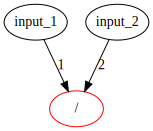

In [4]:
import numpy as np

from tqdm import tnrange


X1, X2 = np.meshgrid(np.linspace(-20, 20, 100), np.linspace(-10, 10, 100))

# Y = (X1**2 - X2**2) / 2
Y = (X1 + X2) / 2
# Y = (X1**2 + X2**2 - 1)**2
# Y = (X1 - X2) / (X1 + X2)

X0 = np.ones(X1.shape)


def fit(tree):
    ans = -np.mean((tree.evaluate(X0, X1, X2) - Y) ** 2)
    if np.isnan(ans):
        return float('-inf')
    return ans


pop = E.bestpop(n_pops=25, gen=10, fit=fit, mutation_param=.3, range=tnrange)
print(fit(pop[0]))
print(pop[0].expr[0])
pop[0].visualize()

HBox(children=(IntProgress(value=0), HTML(value='')))


-0.0
(input_2 + input_3)/(2*sqrt(input_1**2))


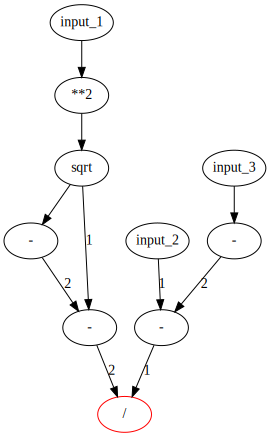

In [5]:
for _ in tnrange(100):
    pop = E.evolve(pop, fit, None)
print(fit(pop[0]))
print(pop[0].expr[0])
pop[0].visualize()

# With noise

-0.0613509110648
input_1/(input_1 + input_2)


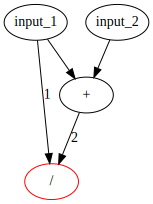

In [6]:
X1 = np.random.uniform(1, 150, 10000)
X2 = np.random.uniform(1, 150, 10000)

Y = (X1 - X2) / (X1 + X2)
Y += np.random.normal(0, Y.std() / 2)
X0 = np.ones(X1.shape)

E = Evolution(2, 10, 1, popsize=50, bestsize=10,
              newgen=5, ops=operations.ops_simple)


def fit(tree):
    ans = -np.mean((tree.evaluate(X1, X2) - Y) ** 2)
    if np.isnan(ans):
        return float('-inf')
    return ans


pop = E.new_population()
for _ in range(50):
    pop = E.evolve(pop, fit, .2)
print(fit(pop[0]))
print(pop[0].expr[0])
pop[0].visualize()

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))


-0.0548176926523
(input_1 + input_1/input_2)/(input_1 + input_2)


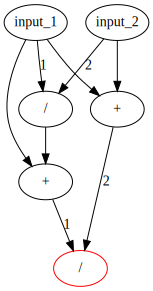

In [7]:
for _ in tnrange(50):
    pop = E.evolve(pop, fit, None)
print(fit(pop[0]))
print(pop[0].expr[0])
pop[0].visualize()

In [8]:
from geopt.util import *

m = DummyModel(list("XY"), "(X - Y) / (X + Y)")

print(fit(m))
print(m.expr[0])

-0.178140204615
(X - Y)/(X + Y)
